# Real Estate Data Case Study Data

## Project By Nayan 

# **Data Description:**

- op_type - offer type ('For rent', 'For sale', 'Buying', 'Renting', 'Change', 'Other').

- district - district, where real estate object located.

- street - address of real estate object in Sqm.

- rooms - number of rooms.

- area - living area of real estate object.

- floor - floor of rel estate object.

- total_floors - total amount of floors in building.

- house_seria - house design ('LT proj.', '602.', 'P. kara', 'Jaun.', 'Specpr.', 'Hrušč.', '119.', 'M. ģim.', 'Renov.', '103.', nan, 'Priv. m.', '467.', 'Staļina', '104.', 'Čehu pr.').

- house_type - type of building ('Brick-Panel', 'Panel', 'Wood', 'Masonry', 'Brick', 'Panel-Brick').

- condition - stuffing premises ('All amenities', 'Partial amenities', 'Without amenities').

- price - price in EUR.

- lat / lon - latitude and longitude of real estate object.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data =pd.read_csv("real_estate.csv", encoding_errors="ignore")
data.head()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1.0,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2.0,50.0,7.0,9.0,602,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2.0,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2.0,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3.0,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042


In [5]:
print("The shape of the data is (Rows, Column):", data.shape)

The shape of the data is (Rows, Column): (4689, 13)


In [6]:
data.columns

Index(['op_type', 'district', 'street', 'rooms', 'area', 'floor',
       'total_floors', 'house_seria', 'house_type', 'condition', 'price',
       'lat', 'lon'],
      dtype='object')

In [8]:
for i in data.columns:
    print(i)

op_type
district
street
rooms
area
floor
total_floors
house_seria
house_type
condition
price
lat
lon


In [9]:
# Data Inconsistency check
data.dtypes

op_type          object
district         object
street           object
rooms           float64
area            float64
floor           float64
total_floors    float64
house_seria      object
house_type       object
condition        object
price           float64
lat             float64
lon             float64
dtype: object

In [10]:
print(data[["floor","total_floors"]])
data.dtypes[["floor","total_floors"]]

      floor  total_floors
0       3.0           5.0
1       7.0           9.0
2       1.0           2.0
3       5.0           5.0
4       3.0          12.0
...     ...           ...
4684    4.0           5.0
4685    2.0           5.0
4686    5.0           5.0
4687    1.0           2.0
4688    4.0           6.0

[4689 rows x 2 columns]


floor           float64
total_floors    float64
dtype: object

# Observation

We have found inconsistency in the data.

The datatypes of floor and total_floors shoulb be object as they showcase categories however, it has been reported as float64.

We need to change it to object type.

In [13]:
# convert the data-types of floor & total_floors

data["floor"]=data["floor"].astype("object")
data["total_floors"]=data["total_floors"].astype("object")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   op_type       4689 non-null   object 
 1   district      4674 non-null   object 
 2   street        4237 non-null   object 
 3   rooms         4500 non-null   float64
 4   area          4325 non-null   float64
 5   floor         4356 non-null   object 
 6   total_floors  4345 non-null   object 
 7   house_seria   4247 non-null   object 
 8   house_type    4239 non-null   object 
 9   condition     4283 non-null   object 
 10  price         4219 non-null   float64
 11  lat           4482 non-null   float64
 12  lon           4482 non-null   float64
dtypes: float64(5), object(8)
memory usage: 476.4+ KB


In [15]:
# To check for any Missing values in the data
data.isnull().sum()

op_type           0
district         15
street          452
rooms           189
area            364
floor           333
total_floors    344
house_seria     442
house_type      450
condition       406
price           470
lat             207
lon             207
dtype: int64

In [16]:
data.isnull().sum().index

Index(['op_type', 'district', 'street', 'rooms', 'area', 'floor',
       'total_floors', 'house_seria', 'house_type', 'condition', 'price',
       'lat', 'lon'],
      dtype='object')

In [17]:
data.isnull().sum().values

array([  0,  15, 452, 189, 364, 333, 344, 442, 450, 406, 470, 207, 207],
      dtype=int64)

In [19]:
data.shape

(4689, 13)

In [18]:
# Find out percentage of null values in each columns
data.shape[0]

4689

In [22]:
for col, val in zip(data.isnull().sum().index,data.isnull().sum().values):
    null_values_present=(val/data.shape[0])*100
    print("Null Values count percentage for columns {} is{}% ".format(col,null_values_present))

Null Values count percentage for columns op_type is0.0% 
Null Values count percentage for columns district is0.3198976327575176% 
Null Values count percentage for columns street is9.63958200042653% 
Null Values count percentage for columns rooms is4.030710172744722% 
Null Values count percentage for columns area is7.762849221582427% 
Null Values count percentage for columns floor is7.1017274472168905% 
Null Values count percentage for columns total_floors is7.336319044572404% 
Null Values count percentage for columns house_seria is9.42631691192152% 
Null Values count percentage for columns house_type is9.596928982725528% 
Null Values count percentage for columns condition is8.658562593303476% 
Null Values count percentage for columns price is10.023459159735552% 
Null Values count percentage for columns lat is4.414587332053743% 
Null Values count percentage for columns lon is4.414587332053743% 


In [23]:
data.dtypes

op_type          object
district         object
street           object
rooms           float64
area            float64
floor            object
total_floors     object
house_seria      object
house_type       object
condition        object
price           float64
lat             float64
lon             float64
dtype: object

In [25]:
# Imputing all null values in columns
data.isnull().sum()

op_type           0
district         15
street          452
rooms           189
area            364
floor           333
total_floors    344
house_seria     442
house_type      450
condition       406
price           470
lat             207
lon             207
dtype: int64

In [27]:
for i in data.columns:
    print("The datatypes for {} is {} and null values are also filles".format(i,data[i].dtypes))
    # check if the datatypes is object or not
    if data[i].dtypes=="object":
        mode_value=data[i].mode()[0]
        data[i].fillna(mode_value, inplace=True)
    elif data[i].dtypes!="object":
        mean_value=data[i].mean()
        data[i].fillna(mean_value, inplace=True)

The datatypes for op_type is object and null values are also filles
The datatypes for district is object and null values are also filles
The datatypes for street is object and null values are also filles
The datatypes for rooms is float64 and null values are also filles
The datatypes for area is float64 and null values are also filles
The datatypes for floor is object and null values are also filles
The datatypes for total_floors is object and null values are also filles
The datatypes for house_seria is object and null values are also filles
The datatypes for house_type is object and null values are also filles
The datatypes for condition is object and null values are also filles
The datatypes for price is float64 and null values are also filles
The datatypes for lat is float64 and null values are also filles
The datatypes for lon is float64 and null values are also filles


In [28]:
data.isnull().sum()

op_type         0
district        0
street          0
rooms           0
area            0
floor           0
total_floors    0
house_seria     0
house_type      0
condition       0
price           0
lat             0
lon             0
dtype: int64

In [29]:
data.head()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1.0,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2.0,50.0,7.0,9.0,602,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2.0,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2.0,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3.0,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042


In [30]:
# Top 10 categories for the Column with Value counts
data["district"].value_counts().sort_values(ascending=False).head(10)

centrs           1450
Purvciems         360
Āgenskalns        253
Imanta            241
Ķengarags         227
Ziepniekkalns     222
Pļavnieki         214
Teika             143
Mežciems          130
Iļģuciems         121
Name: district, dtype: int64

In [31]:
# Top 10 categories for the Column with Value counts
data["op_type"].value_counts().sort_values(ascending=False).head(10)

For sale    2680
For rent    1525
Buying       381
Renting       84
Change        14
Other          5
Name: op_type, dtype: int64

In [32]:
# Top 10 categories for the Column with Value counts
data["street"].value_counts().sort_values(ascending=False).head(10)

Kungu 25                   477
Republikas laukums 3        22
Lielirbes 13                21
Valdemāra 69                14
Blaumaņa 12                 14
Kaivas 50                   12
Anniņmuižas bulvāris 38     12
Šķūņu 6                     12
Kuldīgas 32                 12
Kuģu 15                     11
Name: street, dtype: int64

In [33]:
# Top 10 categories for the Column with Value counts
data["house_seria"].value_counts().sort_values(ascending=False).head(10)

P. kara     1319
Jaun.        819
Renov.       554
Specpr.      396
LT proj.     388
602          287
Hrušč.       251
119          150
M. ģim.      130
Staļina      130
Name: house_seria, dtype: int64

In [35]:
# Top 10 categories for the Column with Value counts
data["house_type"].value_counts().sort_values(ascending=False).head(10)

Masonry        1772
Panel          1210
Brick           862
Brick-Panel     442
Panel-Brick     209
Wood            194
Name: house_type, dtype: int64

In [38]:
# Top 10 categories for the Column with Value counts
data["lat"].value_counts().sort_values(ascending=False).head(10)

46.314475    452
55.831982    207
56.859788     80
56.945338     25
56.966576     25
56.955252     22
56.954172     21
56.933500     21
56.952698     18
48.296950     17
Name: lat, dtype: int64

In [39]:
# Top 10 categories for the Column with Value counts
data["lon"].value_counts().sort_values(ascending=False).head(10)

 11.048029     452
 22.303814     207
 24.308342      80
 24.133750      25
 24.109464      25
 24.099999      22
 24.244325      21
 24.042485      21
 24.095453      17
-100.708194     17
Name: lon, dtype: int64

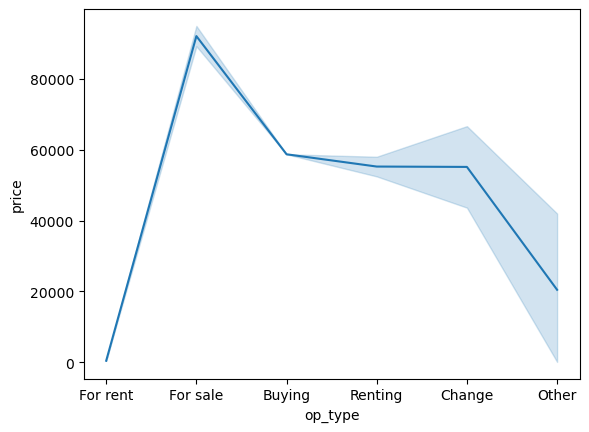

In [41]:
sns.lineplot(data=data, x="op_type", y="price")
plt.show()

This lineplot shows that the highest price is for the sale category.

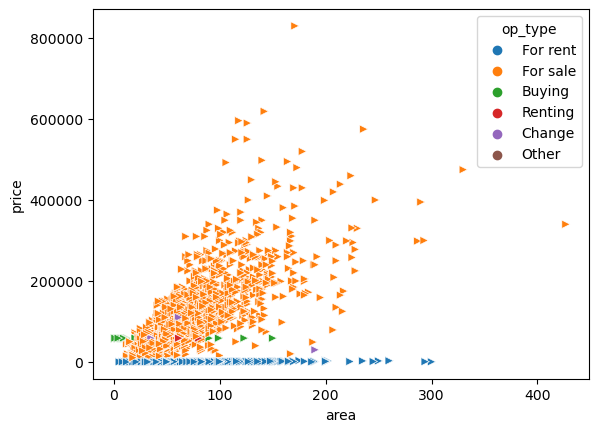

In [44]:
sns.scatterplot(data=data, x= "area", y="price", hue="op_type", marker=">", color="c")
plt.show()

This scatter plot shows majority of rooms are below area 200 Sqm. Most of the rooms are available for sale.

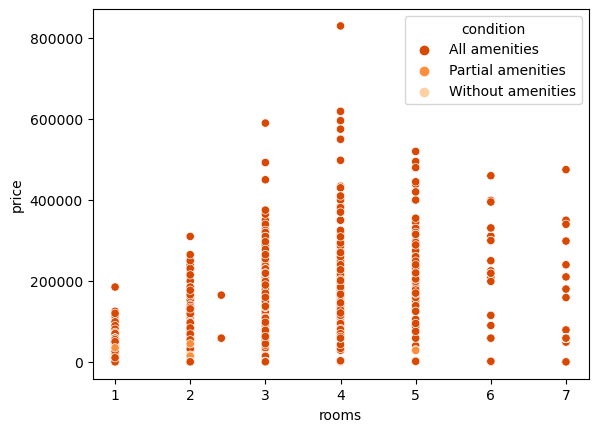

In [49]:
sns.scatterplot(data=data, x= "rooms", y="price", hue="condition", marker="o", palette="Oranges_r")
plt.show()

In this scatter  plot you can see more rooms available for sales, most are of 4BHK and at very high Price. & 7 BHK is at Very low Price.

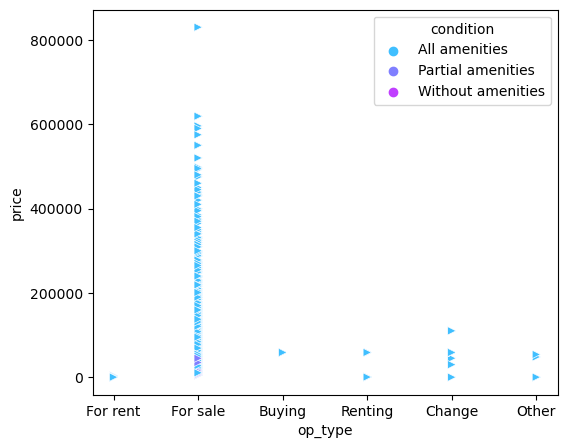

In [53]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=data, x= "op_type", y="price", hue="condition", marker=">", palette="cool")
plt.show()

In Scatterplot you can see more rooms are for sale.

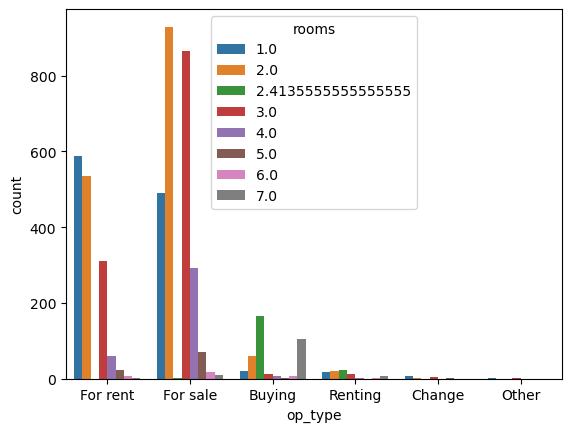

In [55]:
sns.countplot(data=data, x="op_type", hue="rooms")
plt.show()

In Countplot you can see more rooms are for sale with number of rooms BHK Allocation

In [56]:
category_data=[]
for col in data.columns:
    if data[col].dtypes=="object":
        category_data.append(col)

In [60]:
numerical_columns=[]
for col in data.columns:
    if data[col].dtypes!="object":
        numerical_columns.append(col)

In [61]:
category_data

['op_type', 'district', 'street', 'house_seria', 'house_type', 'condition']

In [62]:
numerical_columns

['rooms', 'area', 'floor', 'total_floors', 'price', 'lat', 'lon']

In [63]:
print("categorical Columns", category_data)

categorical Columns ['op_type', 'district', 'street', 'house_seria', 'house_type', 'condition']


In [64]:
print("Numerical Columns", numerical_columns)

Numerical Columns ['rooms', 'area', 'floor', 'total_floors', 'price', 'lat', 'lon']


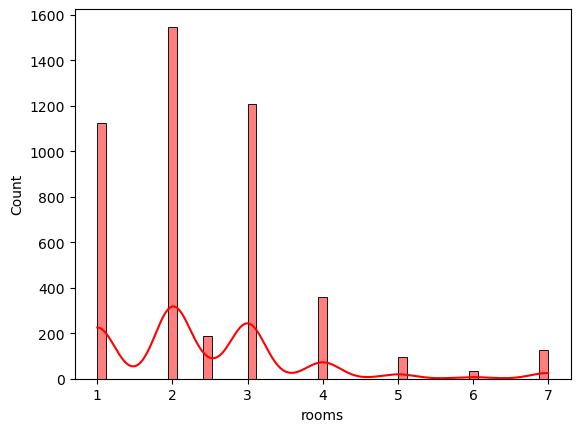

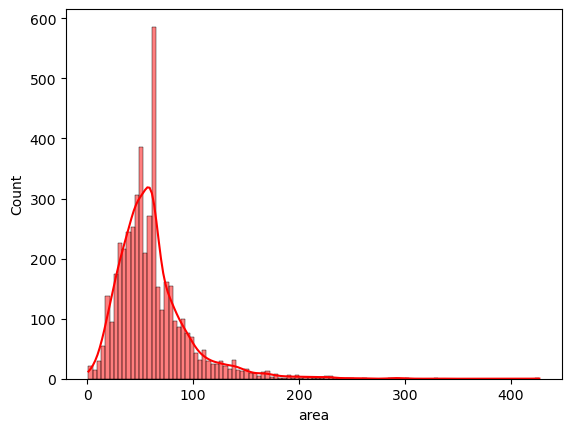

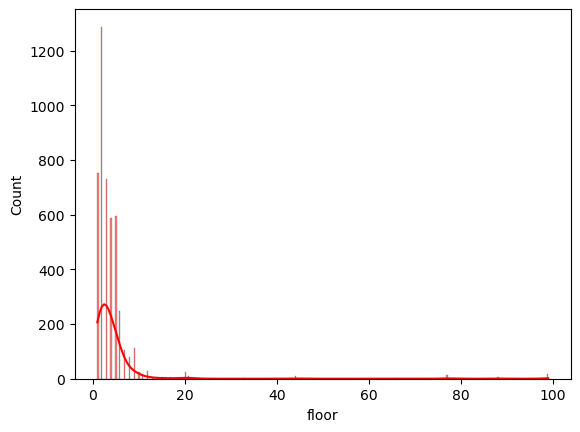

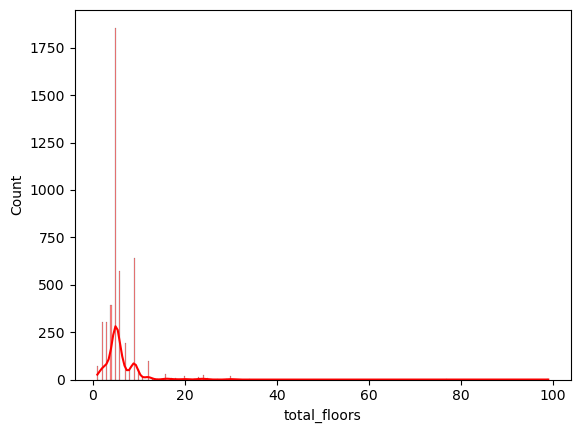

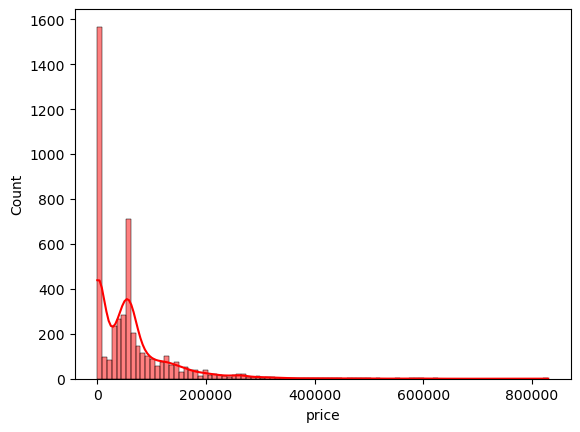

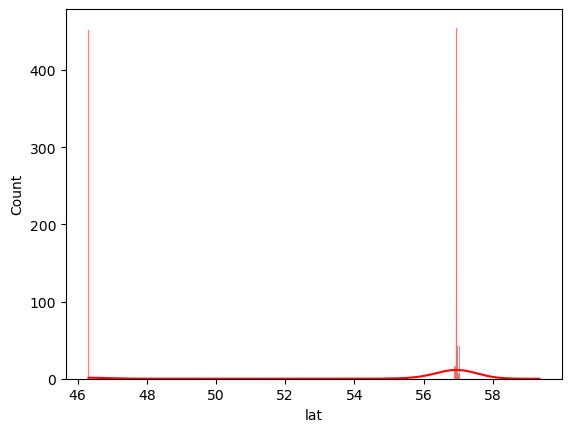

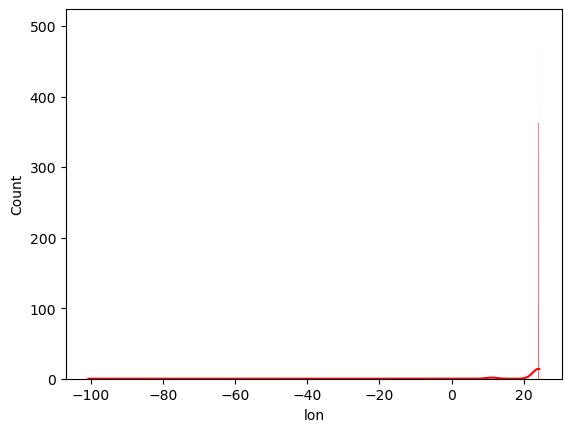

In [65]:
for col in numerical_columns:
    sns.histplot(data=data, x=col, kde=True, color="r")
    plt.show()

Histogram for each of the numerical_columns by total value count of columns. The distribution of most of the features are right skewed.

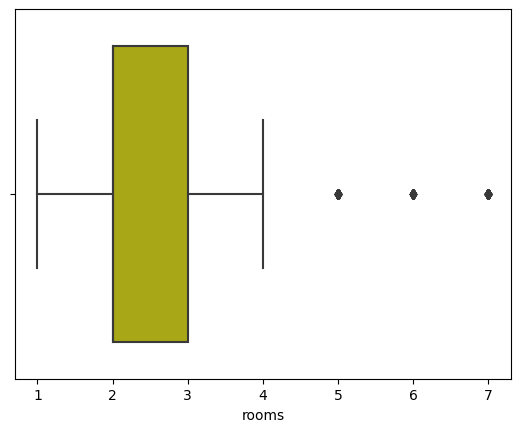

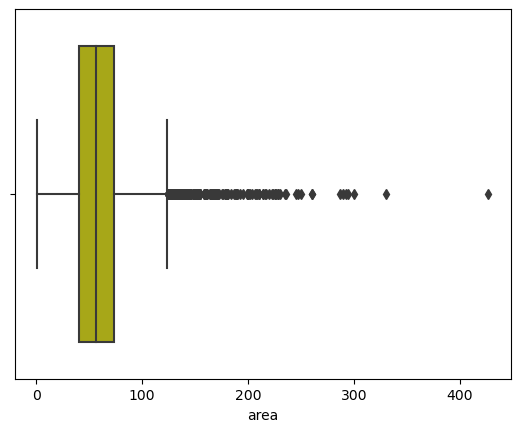

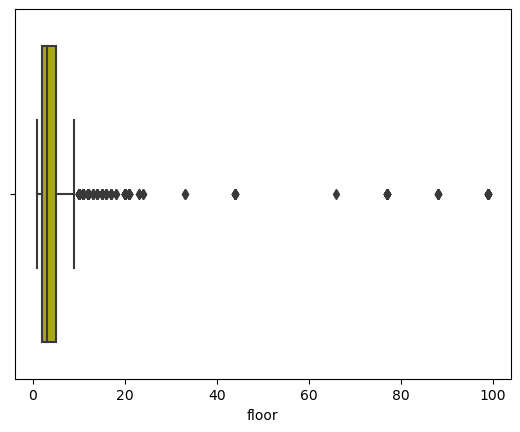

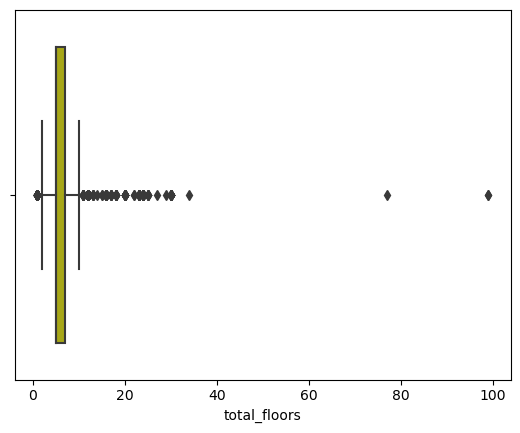

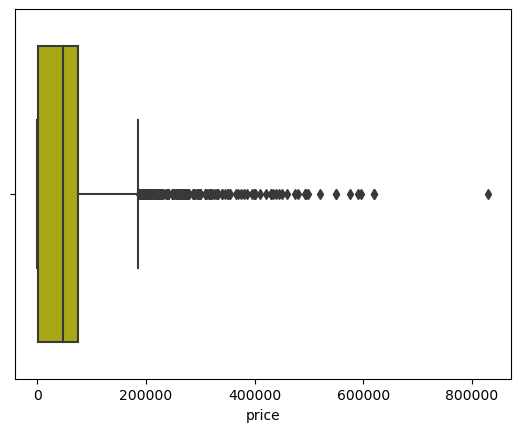

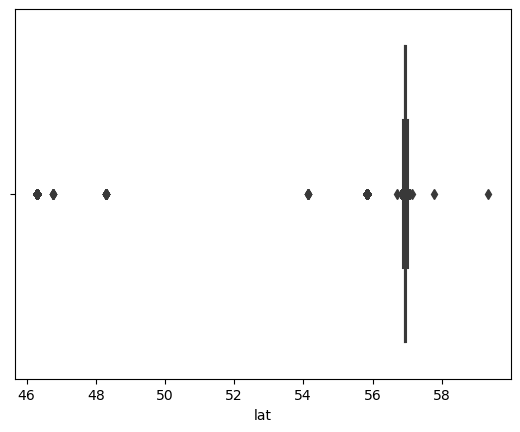

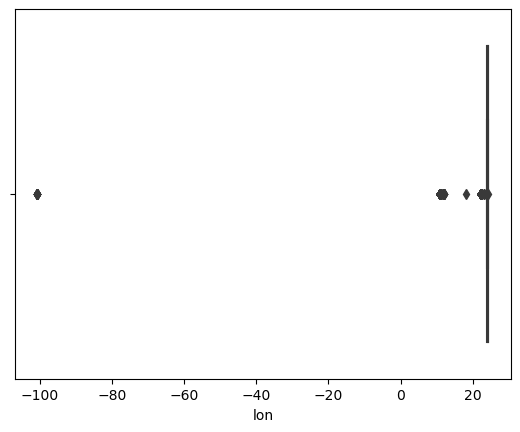

In [67]:
for col in numerical_columns:
    sns.boxplot(data=data, x=col, color="y")
    plt.show()

Boxplot shows there is high level of inconsistency in data. Each of the numerical Columns is having some amount of Noice in it.

In [68]:
data.columns

Index(['op_type', 'district', 'street', 'rooms', 'area', 'floor',
       'total_floors', 'house_seria', 'house_type', 'condition', 'price',
       'lat', 'lon'],
      dtype='object')

Dropping Columns with Noice and Unnecessary data.

In [76]:
df=data.drop(["district", 'street', 'house_seria', 'lat', "lon"], axis=1, inplace=True)

In [77]:
data.columns

Index(['op_type', 'rooms', 'area', 'floor', 'total_floors', 'house_type',
       'condition', 'price'],
      dtype='object')

In [78]:
category_data=[]
for col in data.columns:
    if data[col].dtypes=="object":
        category_data.append(col)

In [79]:
category_data

['op_type', 'house_type', 'condition']

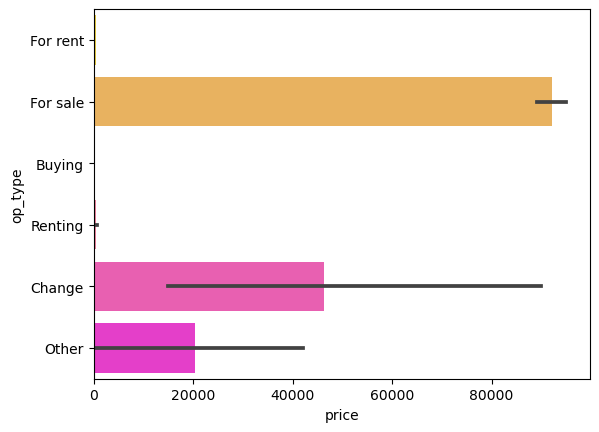

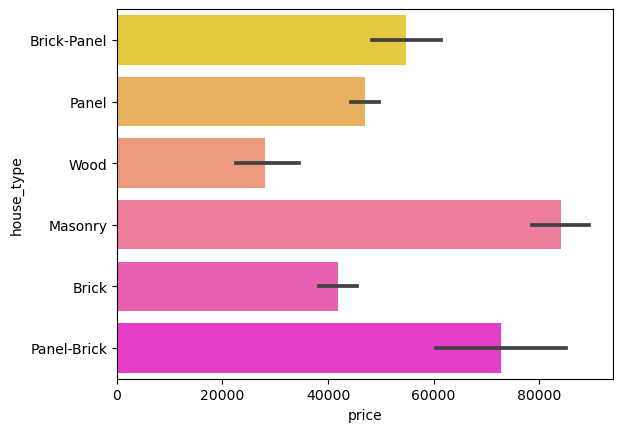

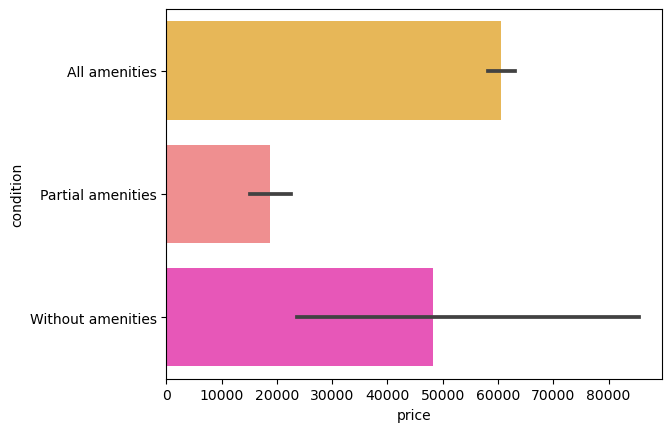

In [83]:
for col in category_data:
    sns.barplot(data=data, x="price", y=col, palette="spring_r")
    plt.show()

1. first Barplot is showing that the rooms are in higher price for sale. for rent the price is very low

2. second Barplot is showing that the most rooms are of Masonary type are for higher Price.

3. Third Barplot is showing that the rooms coming with all amenities are in higher price.

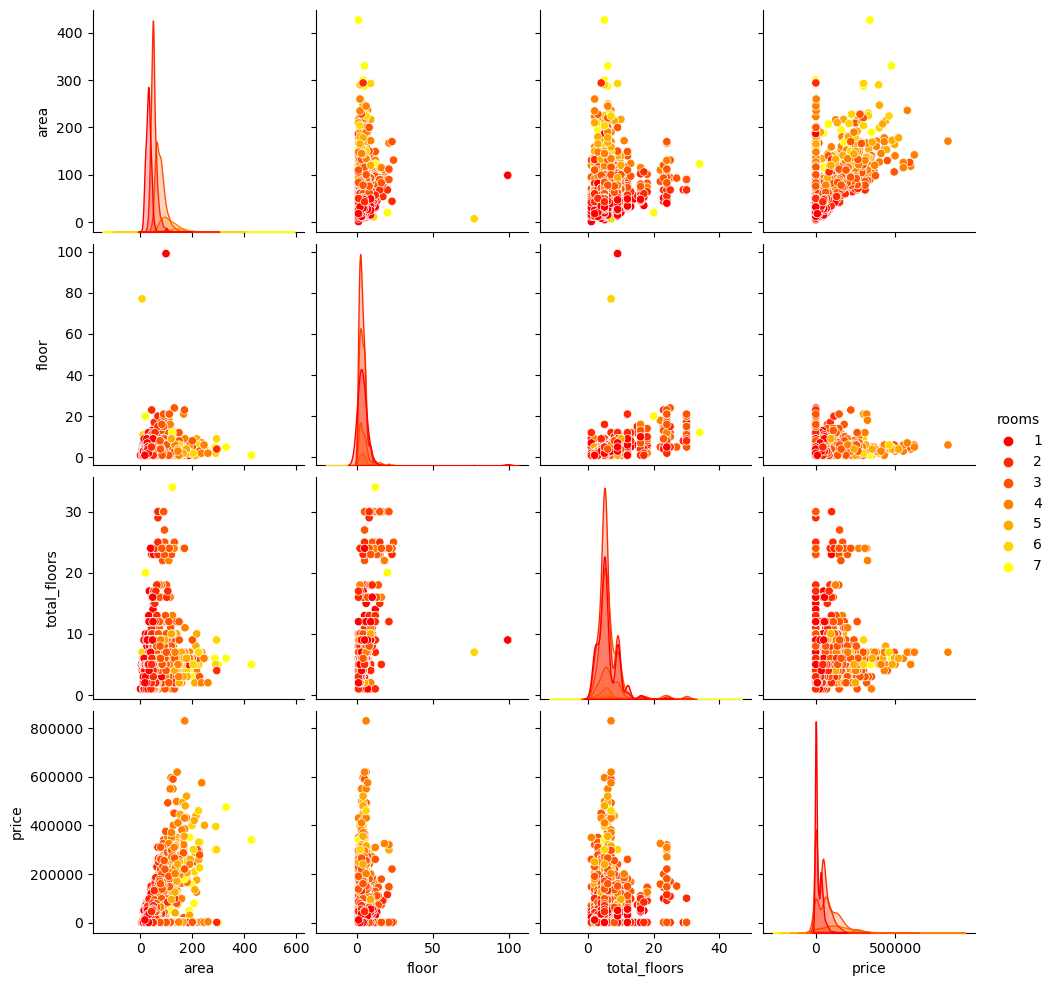

In [86]:
sns.pairplot(data=data, hue="rooms", palette= "autumn")
plt.show()

The Pairplot is giving very clear idea about the data with all the numerical features comparing with each other.

In [88]:
data.corr()

,rooms,area,floor,total_floors,price
rooms,1.000000,0.746649,0.052005,0.131194,0.523667
area,0.746649,1.000000,-0.023553,0.059476,0.584147
floor,0.052005,-0.023553,1.000000,0.221144,0.056639
total_floors,0.131194,0.059476,0.221144,1.000000,0.038738
price,0.523667,0.584147,0.056639,0.038738,1.000000


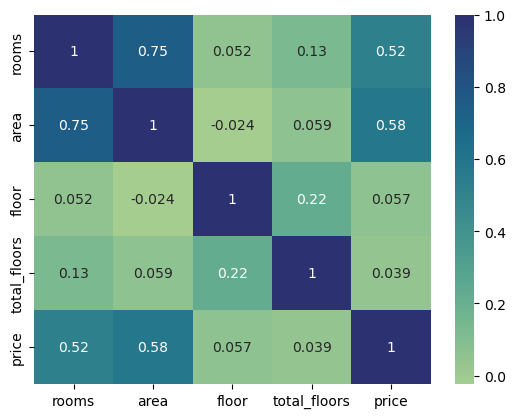

In [89]:
sns.heatmap(data.corr(), annot=True, cmap="crest")
plt.show()

The Relation Between features are significantly Ok.